# Regression Diagnostics

In [2]:
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

In [8]:
res = smf.ols("Lottery~Literacy + np.log(Pop1831)", data=df).fit()

In [9]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Sat, 28 Aug 2021   Prob (F-statistic):           1.90e-08
Time:                        14:07:06   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233      6.995      0.000     176.358     316.510
Literacy           -0.4889      0.128     -3.832      0.000      -0.743      -0.235
np.log(Pop1831)   -31.3114      5.977     -5.239      0.000     -43.199     -19.424
==============================================================================
Omnibus:                        3.713   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.394
Skew:                          -0.487   Prob(JB):                        0.183
Kurtosis:                       3.003   Cond. No.                         702.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Normality of residuals
## Jarque-Bera Test:

In [13]:
name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis" ]

In [14]:
test = sms.jarque_bera(res.resid)
lzip(name, test)

[('Jarque-Bera', 3.393608024843163),
 ('Chi^2 two-tail prob.', 0.183268312316634),
 ('Skew', -0.48658034311223347),
 ('Kurtosis', 3.0034177578816315)]

## Influence Tests

In [15]:
from statsmodels.stats.outliers_influence import OLSInfluence

In [16]:
test_class = OLSInfluence(res)

In [17]:
test_class.dfbeta[5:,:]

array([[ 8.26794653e-01, -9.37228508e-03, -3.91782694e-02],
       [-4.60565242e-01, -6.00836231e-03,  1.07905336e-01],
       [ 2.20296666e+00, -8.83371102e-03, -2.94410442e-01],
       [-3.09677967e+00, -1.44344868e-02,  5.88879087e-01],
       [-6.94207982e-01,  8.22842167e-04,  1.03706847e-01],
       [ 4.10842584e-01, -1.11761663e-02,  7.29888204e-02],
       [-1.89562753e-01,  2.08460190e-03, -6.30431760e-02],
       [ 2.38248735e+00, -6.58585145e-03, -3.89952698e-01],
       [ 4.44134010e+00, -7.37883826e-03, -6.57505666e-01],
       [ 3.65734696e-02, -2.06183483e-03,  3.90285143e-02],
       [ 1.48071908e-01,  4.65456319e-05, -2.83829919e-02],
       [-4.66538011e+00,  2.34268272e-02,  5.91701800e-01],
       [ 2.88977165e+00, -2.35317798e-02, -2.90569539e-01],
       [-6.22764720e-02,  1.28974407e-03,  5.15640285e-03],
       [-8.19834682e+00, -3.43559449e-02,  1.69772160e+00],
       [ 4.31761529e+00, -1.53701973e-02, -5.82861140e-01],
       [-4.22405692e+00, -2.94719098e-02

In [18]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

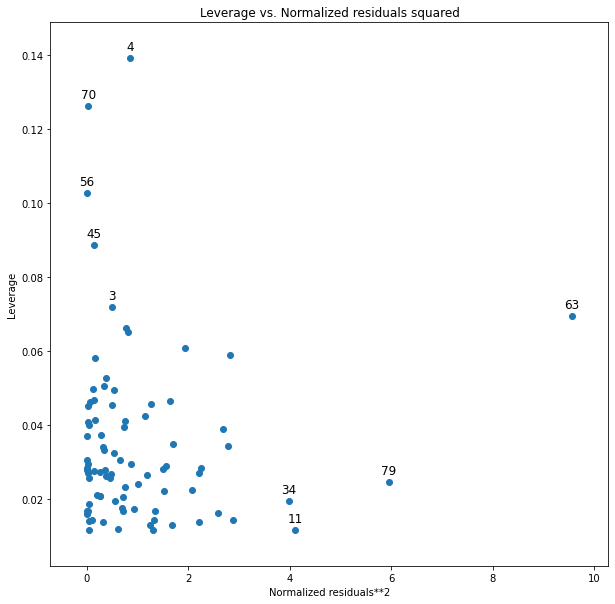

In [19]:
fig, ax = plt.subplots(figsize=(10,10))
fit = plot_leverage_resid2(res, ax=ax)

# Multicollinearity

In [21]:
 np.linalg.cond(res.model.exog)

702.1792145490062

# Heteroskedasticity

In [23]:
name = ['Lagrange multiplier stat', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(res.resid, res.model.exog)
lzip(name, test)

[('Lagrange multiplier stat', 4.8932133740939765),
 ('p-value', 0.08658690502352126),
 ('f-value', 2.5037159462564467),
 ('f p-value', 0.08794028782672943)]

In [25]:
name = ['F stat', 'p-value']
test = sms.het_goldfeldquandt(res.resid, res.model.exog)
lzip(name, test)

[('F stat', 1.1002422436378139), ('p-value', 0.38202950686925286)]

# Linearity

In [26]:
name = ['t value', 'p value']
test = sms.linear_harvey_collier(res)
lzip(name, test)

[('t value', -1.07964900777768), ('p value', 0.2834639247561694)]